# コンペ概要

交通量予測

### 似ているコンペ

### データセット
- 学習データ数 : 37696 (2013~2017年のデータ)
- テストデータ数 : 7949 (2018年のデータ)

テストデータの2000サンプルでスコアリングしている。スコアはRMSE。

### 説明変数と目的変数

#### 説明変数
- holiday : 祝日の種類(categorical)
- temperature : 気温(real)
- rain_in_hour : その1時間における降水量(real) 
- snow_in_hour : その1時間における降雪量(real)
- clouds_cover : 雲の割合(%) (real)
- weather : 天気の種類(categorical)
- weather_detail : より詳細な天気の種類(categorical)
- timestamp : 日付と時間

#### 目的変数
- traffic_volume: その1時間における交通量(real)

## 全体を俯瞰

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [2]:
DATA_DIR = '../../dataset/input/'
train_raw = pd.read_csv(DATA_DIR + 'train.csv')
test_raw = pd.read_csv(DATA_DIR + 'test.csv')

In [3]:
train_raw.head()

,holiday,temperature,rain_in_hour,snow_in_hour,clouds_cover,weather,weather_detail,timestamp,traffic_volume
0,New Years Day,263.49,0.0,0.0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439
1,None,263.78,0.0,0.0,40,Clouds,scattered clouds,2013-01-01 01:00:00,1502
2,None,264.16,0.0,0.0,75,Snow,heavy snow,2013-01-01 02:00:00,933
3,None,263.95,0.0,0.0,90,Clouds,overcast clouds,2013-01-01 03:00:00,576
4,None,263.65,0.0,0.0,90,Clouds,overcast clouds,2013-01-01 04:00:00,372


In [4]:
test_raw.head()

,holiday,temperature,rain_in_hour,snow_in_hour,clouds_cover,weather,weather_detail,timestamp
0,New Years Day,249.36,0.0,0.0,1,Clear,sky is clear,2018-01-01 00:00:00
1,None,249.08,0.0,0.0,1,Clear,sky is clear,2018-01-01 01:00:00
2,None,248.86,0.0,0.0,1,Clear,sky is clear,2018-01-01 02:00:00
3,None,248.72,0.0,0.0,1,Clear,sky is clear,2018-01-01 03:00:00
4,None,248.43,0.0,0.0,1,Clear,sky is clear,2018-01-01 04:00:00


In [5]:
train_raw.describe()

,temperature,rain_in_hour,snow_in_hour,clouds_cover,traffic_volume
count,37696.000000,37696.000000,37696.000000,37696.000000,37696.000000
mean,281.280699,0.401765,0.000284,49.080672,3263.287458
std,13.422033,50.647618,0.009235,38.952748,1989.499982
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.580000,0.000000,0.000000,1.000000,1190.000000
50%,282.865000,0.000000,0.000000,64.000000,3383.000000
75%,291.660000,0.000000,0.000000,90.000000,4935.000000
max,308.240000,9831.300000,0.510000,100.000000,7280.000000


In [6]:
# ????
len(train_raw['timestamp'].unique())

31939

In [7]:
train_raw['timestamp'].value_counts()

2013-05-19 10:00:00    6
2013-04-18 22:00:00    6
2015-07-06 13:00:00    5
2013-05-31 02:00:00    5
2013-05-19 09:00:00    5
                      ..
2016-09-22 08:00:00    1
2017-10-02 06:00:00    1
2013-12-15 03:00:00    1
2017-06-24 22:00:00    1
2013-07-08 19:00:00    1
Name: timestamp, Length: 31939, dtype: int64

In [8]:
train_raw[train_raw['timestamp'] == '2013-04-18 22:00:00']

,holiday,temperature,rain_in_hour,snow_in_hour,clouds_cover,weather,weather_detail,timestamp,traffic_volume
2690,None,274.79,0.0,0.0,90,Mist,mist,2013-04-18 22:00:00,1532
2691,None,274.79,0.0,0.0,90,Drizzle,light intensity drizzle,2013-04-18 22:00:00,1532
2692,None,274.79,0.0,0.0,90,Rain,light rain,2013-04-18 22:00:00,1532
2693,None,274.79,0.0,0.0,90,Rain,moderate rain,2013-04-18 22:00:00,1532
2694,None,274.79,0.0,0.0,90,Snow,heavy snow,2013-04-18 22:00:00,1532
2695,None,274.79,0.0,0.0,90,Snow,snow,2013-04-18 22:00:00,1532


In [9]:
test_raw.describe()

,temperature,rain_in_hour,snow_in_hour,clouds_cover
count,7949.000000,7949.000000,7949.0,7949.000000
mean,282.851502,0.121765,0.0,45.567996
std,13.759694,0.624227,0.0,39.461544
min,247.080000,0.000000,0.0,0.000000
25%,271.580000,0.000000,0.0,1.000000
50%,287.610000,0.000000,0.0,40.000000
75%,294.150000,0.000000,0.0,90.000000
max,310.070000,10.600000,0.0,92.000000


In [10]:
test_raw['timestamp'].value_counts()

2018-04-14 09:00:00    5
2018-03-20 14:00:00    5
2018-08-24 07:00:00    5
2018-04-13 21:00:00    5
2018-09-20 18:00:00    5
                      ..
2018-04-02 06:00:00    1
2018-03-28 18:00:00    1
2018-02-26 23:00:00    1
2018-02-02 17:00:00    1
2018-01-15 14:00:00    1
Name: timestamp, Length: 6533, dtype: int64

In [11]:
test_raw[test_raw['timestamp'] == '2018-09-20 18:00:00']

,holiday,temperature,rain_in_hour,snow_in_hour,clouds_cover,weather,weather_detail,timestamp
7669,None,290.9,9.62,0.0,90,Rain,proximity shower rain,2018-09-20 18:00:00
7670,None,290.9,9.62,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-20 18:00:00
7671,None,290.9,9.62,0.0,90,Mist,mist,2018-09-20 18:00:00
7672,None,290.9,9.62,0.0,90,Fog,fog,2018-09-20 18:00:00
7673,None,290.9,9.62,0.0,90,Haze,haze,2018-09-20 18:00:00


In [12]:
test_raw.tail()

,holiday,temperature,rain_in_hour,snow_in_hour,clouds_cover,weather,weather_detail,timestamp
7944,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00
7945,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00
7946,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00
7947,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00
7948,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00


In [13]:
print("================================train_raw null rate================================")
print(train_raw.isna().mean())
print("================================test_raw null rate================================")
print(test_raw.isna().mean())

================================train_raw null rate================================
holiday           0.0
temperature       0.0
rain_in_hour      0.0
snow_in_hour      0.0
clouds_cover      0.0
weather           0.0
weather_detail    0.0
timestamp         0.0
traffic_volume    0.0
dtype: float64
================================test_raw null rate================================
holiday           0.0
temperature       0.0
rain_in_hour      0.0
snow_in_hour      0.0
clouds_cover      0.0
weather           0.0
weather_detail    0.0
timestamp         0.0
dtype: float64


### ここまでのメモ

* データの欠損はない
* `holidays`
  * 0時の行のみアノテーションされているから、全ての行に反映させる必要性
* trainデータの`temperature`には０がある...?
  * 欠損値ってことか...?
  * ちなみにtestにはみられないデータ
  * 数によってはdropして良さそう
* `rain_in_hour`, `snow_in_hour`の扱い
  * trainでもtestでも両方0が75％以上入っている
  * `snow_in_hour`については、testでは全て0なので抜いたほうがいいのか...?
  * `rain_in_hour`の大きすぎるデータについても、学習の際は除くべきかも
* **同じ時刻で違う天気の情報が入ったデータがある**
* テストデータの期間は、2018/01/01~2019/09/30

## 細かい点を調査

In [14]:
# temperatureが０になっている怪しいデータを取り出す
# -> 数件だったので取り除く
train_raw[train_raw['temperature'] == 0]

,holiday,temperature,rain_in_hour,snow_in_hour,clouds_cover,weather,weather_detail,timestamp,traffic_volume
9339,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 03:00:00,361
9340,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 04:00:00,734
9341,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 05:00:00,2557
9342,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 06:00:00,5150
9387,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 03:00:00,291
9388,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 04:00:00,284
9389,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 05:00:00,434
9390,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 06:00:00,739
9391,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 07:00:00,962
9392,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 08:00:00,1670


In [15]:
# rain_in_hourは一件だけ以上にでかいので、このレコードも除く
train_raw[train_raw['rain_in_hour'] > 50]

,holiday,temperature,rain_in_hour,snow_in_hour,clouds_cover,weather,weather_detail,timestamp,traffic_volume
5688,None,289.10,55.63,0.0,68,Rain,very heavy rain,2013-08-07 02:00:00,315
22313,None,302.11,9831.30,0.0,75,Rain,very heavy rain,2016-07-11 17:00:00,5535


In [16]:
# カテゴリ変数
# 11種類
train_raw['weather'].value_counts()

Clouds          12045
Clear           10679
Rain             4535
Mist             4403
Snow             2158
Drizzle          1448
Haze              984
Thunderstorm      753
Fog               669
Smoke              18
Squall              4
Name: weather, dtype: int64

In [17]:
test_raw['weather'].value_counts()

Clear           2328
Clouds          1997
Mist            1099
Rain             992
Snow             521
Drizzle          278
Haze             272
Thunderstorm     268
Fog              192
Smoke              2
Name: weather, dtype: int64

In [18]:
# カテゴリ変数
# 38種類
train_raw['weather_detail'].value_counts()

sky is clear                           8966
mist                                   4403
overcast clouds                        4037
broken clouds                          3723
scattered clouds                       2732
light rain                             2715
Sky is Clear                           1713
few clouds                             1553
light snow                             1531
moderate rain                          1313
haze                                    984
light intensity drizzle                 843
fog                                     669
drizzle                                 547
proximity thunderstorm                  483
heavy snow                              411
heavy intensity rain                    383
snow                                    199
proximity shower rain                    93
thunderstorm                             88
heavy intensity drizzle                  56
thunderstorm with heavy rain             54
thunderstorm with light rain    

In [19]:
test_raw['weather_detail'].value_counts()

sky is clear                           2315
mist                                   1099
broken clouds                           655
scattered clouds                        564
overcast clouds                         552
light rain                              548
light snow                              415
moderate rain                           320
haze                                    272
few clouds                              226
fog                                     192
light intensity drizzle                 192
proximity thunderstorm                  183
heavy intensity rain                     80
drizzle                                  75
snow                                     74
proximity shower rain                    42
thunderstorm                             37
heavy snow                               28
proximity thunderstorm with rain         14
thunderstorm with light rain             13
Sky is Clear                             13
heavy intensity drizzle         

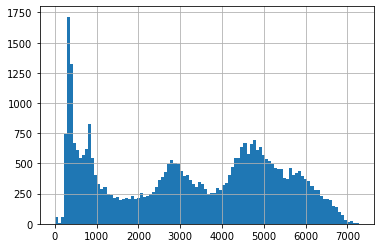

In [20]:
# 目的変数の分布
# 割と満遍なく広がっている印象
train_raw['traffic_volume'].hist(bins=100)

### ここまでのメモ (前処理の方針)
* ベースラインの設定
  * `temperature`が0のデータと`rain_in_hour`が9831.30のデータは除く
  * 目的変数は標準化か対数変換
  * 日付データは、Year, Month, Day, DayOfWeek, DayOfYear, WeekOfYear, WeekOfMonthで分解
  * モデルはLGBMのデフォルトパラメータ
  * validationはrandom split (8:2)

## 交通量と時間の関係

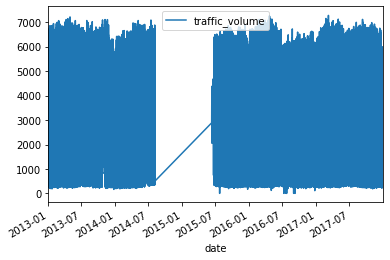

In [21]:
# とりあえず全期間表示
# 空白の期間がある...?
train_raw['date'] = pd.to_datetime(train_raw['timestamp'])
train_raw[['date','traffic_volume']].set_index('date').plot()

### 1年の変化

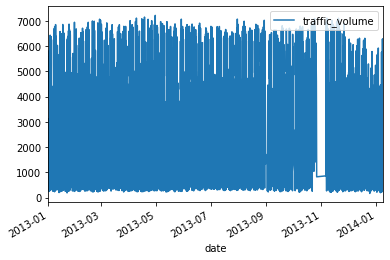

In [22]:
# 季節的な傾向はあんまりなさそう
# ここにも欠損っぽい空白の期間がみられる
train_raw[0:(24*365)][['date','traffic_volume']].set_index('date').plot()

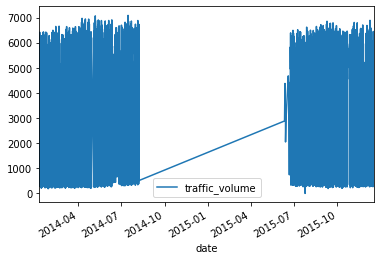

In [23]:
train_raw[(24*365):(48*365)][['date','traffic_volume']].set_index('date').plot()

### 1ヶ月の変化

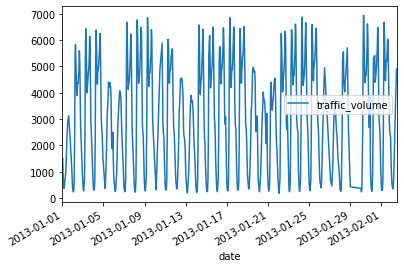

In [24]:
# 一定間隔で落ち込んでいる...?
train_raw[0:(24*31)][['date','traffic_volume']].set_index('date').plot()

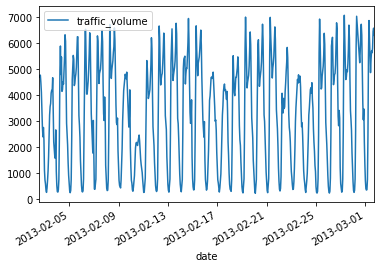

In [25]:
# こっちも以外とそんな感じの傾向取れる
train_raw[(24*31):(24*60)][['date','traffic_volume']].set_index('date').plot()

### 1週間の変化

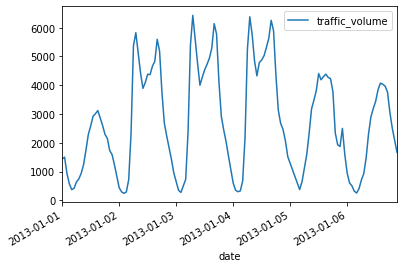

In [26]:
# 一定間隔で落ち込んでいる...?
train_raw[0:(24*7)][['date','traffic_volume']].set_index('date').plot()

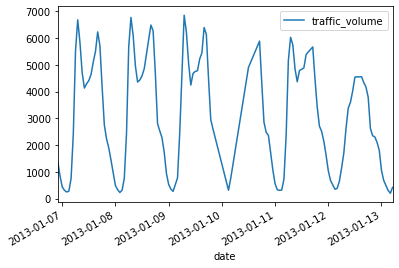

In [27]:
train_raw[(24*7):(24*14)][['date','traffic_volume']].set_index('date').plot()

### 1日の変化

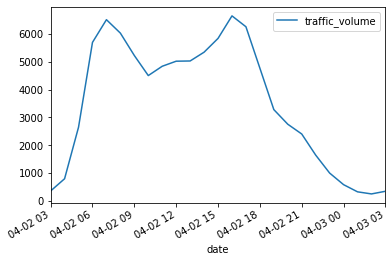

In [28]:
train_raw[10800:10824][['date','traffic_volume']].set_index('date').plot()

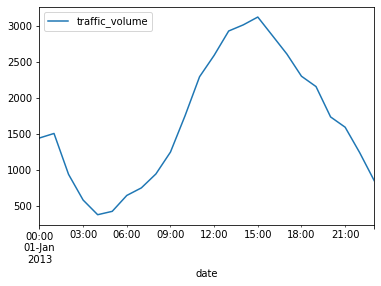

In [29]:
train_raw[0:24][['date','traffic_volume']].set_index('date').plot()

In [30]:
# Hourごとにgroupbyして平均をみてみる
train_raw['Hour'] = train_raw['date'].apply(lambda x: x.hour)
train_raw.groupby('Hour').mean()

,temperature,rain_in_hour,snow_in_hour,clouds_cover,traffic_volume
Hour,,,,,
0,280.028735,0.152802,0.000310,44.128952,844.197148
1,279.547784,0.131727,0.000379,44.039752,520.684472
2,279.360413,0.131019,0.000000,43.780000,391.898750
3,278.914779,0.188138,0.000101,42.746042,372.226092
4,278.464863,0.159045,0.000061,45.500306,701.162890
5,278.477405,0.196309,0.000062,44.971893,2084.489069
6,278.317741,0.228109,0.000061,46.073665,4167.179251
7,278.549577,0.216679,0.000062,50.630314,4742.792976
8,278.811960,0.151082,0.000155,51.987021,4608.443758


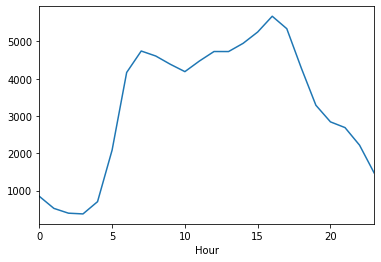

In [31]:
train_raw.groupby('Hour').mean()['traffic_volume'].plot()